Notebook using

MobileNet SSD v2 (Faces)

Detects the location of human faces
Dataset: Open Images v4
Input size: 320x320

In [1]:
# import the necessary packages
from edgetpu.detection.engine import DetectionEngine
from PIL import Image
from PIL import ImageDraw
import numpy as np
import io
%matplotlib inline

from IPython.display import display # to display images

We first create an engine -> https://coral.withgoogle.com/docs/reference/edgetpu.detection.engine/

In [2]:
MODEL = "/home/robin/edgetpu/all_models/mobilenet_ssd_v2_face_quant_postprocess_edgetpu.tflite"

In [3]:
# Run inference.
engine = DetectionEngine(MODEL)

In [4]:
engine.model_path()

'/home/robin/edgetpu/all_models/mobilenet_ssd_v2_face_quant_postprocess_edgetpu.tflite'

In [5]:
engine.get_input_tensor_shape()

array([  1, 320, 320,   3], dtype=int32)

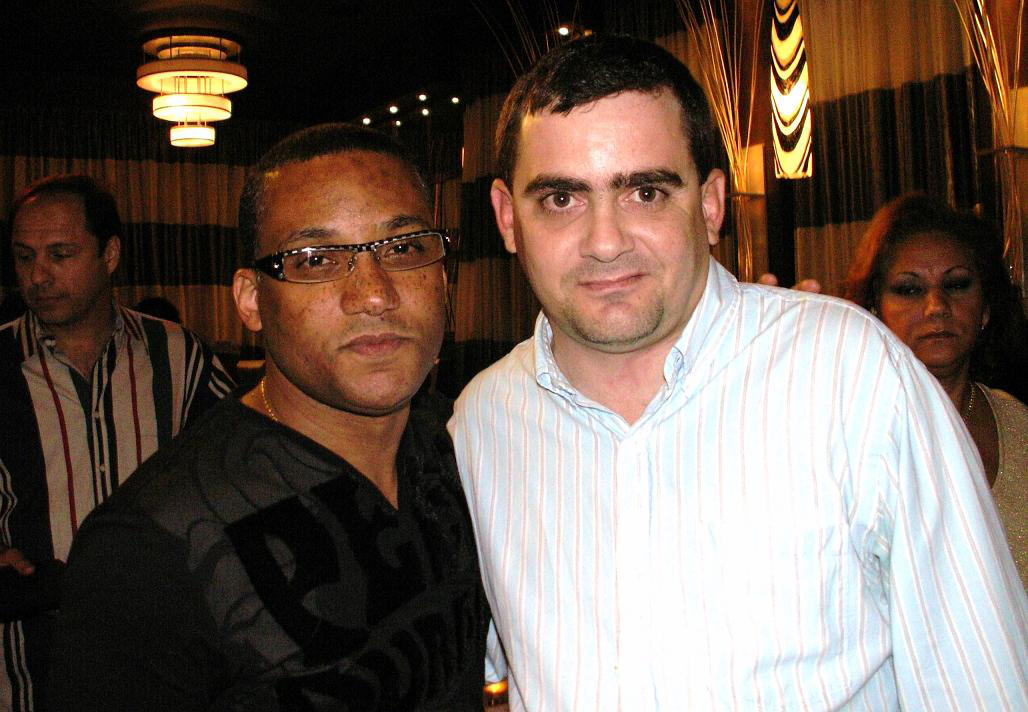

In [6]:
image_file = "face.jpg"
# image_file = "people_car.jpg" # returns zero predictions
image = Image.open(image_file)  # PIL img object.
display(image)

In [7]:
image.size

(1028, 712)

[DetectWithImage](https://coral.withgoogle.com/docs/reference/edgetpu.detection.engine/#edgetpu.detection.engine.DetectionEngine.DetectWithImage) is resizing the image as required, first arg is a PIL image

In [8]:
%%time
predictions = engine.DetectWithImage(image, threshold=0.05,keep_aspect_ratio=True,relative_coord=False,top_k=10)

CPU times: user 2.6 ms, sys: 4.27 ms, total: 6.87 ms
Wall time: 20.9 ms


Prediction returns a list of detection candidate objects -> https://coral.withgoogle.com/docs/reference/edgetpu.detection.engine/

In [9]:
predictions

In [10]:
predictions[0].label_id

0

In [11]:
predictions[0].score

0.99609375

In [12]:
predictions[0].bounding_box

array([[474.22854805,  38.03488787],
       [738.80134916, 353.53096837]])

In [13]:
engine.get_inference_time()

4.098999977111816

## Draw bounging boxes

In [14]:
draw = ImageDraw.Draw(image)

In [15]:
for obj in predictions:
    print ('score = ', obj.score)
    box = obj.bounding_box.flatten().tolist()
    draw.rectangle(box, outline='red')

score =  0.99609375
score =  0.99609375
score =  0.83203125
score =  0.5


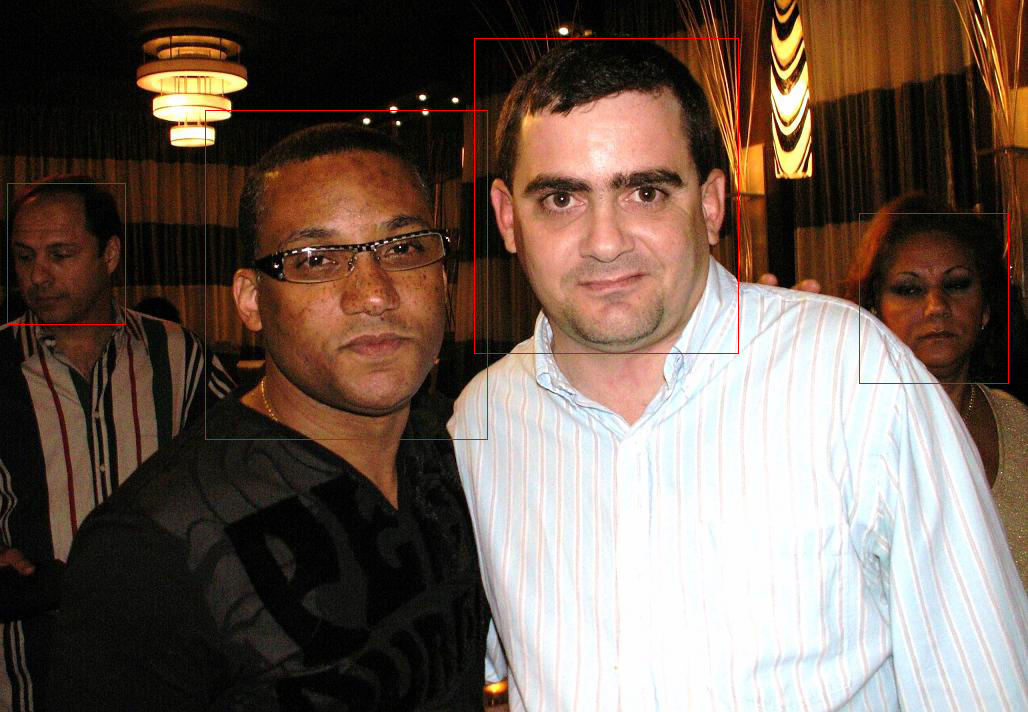

In [16]:
display(image)